In [1115]:
#Importing Libraries

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import yfinance as yf

In [1116]:
#Allows Max Display

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [1132]:
#Different Stocks to do the analyis on

#tickers = pd.read_excel("E://Stock_data.xlsx", sheet_name="Sheet1")["Ticker"] 
#tickers = pd.read_excel("E://Nasdaq.xlsx")["Ticker"]
#tickers = ["VRSN", "ATVi", "MCO","GOOG","AAPL","WDAY"]
tickers = ["AAPL","NKE","GOOGL","AMZN"]

In [1133]:
#Different time periods to do the analyis on

start=dt.datetime(2010,9,15)
mid_1=dt.datetime(2021,9,15)
mid_2=dt.datetime(2021,9,15)
end=dt.datetime(2022,9,15)

Exercise - Why Log Returns are better

In [1134]:
stock_data = pd.DataFrame([100,120,96], index=["Day 1","Day 2","Day 3"], columns=["Stock Price"])
print (stock_data)
print()

returns = stock_data.pct_change()
print (returns)
print ()
print("Total Change = ",returns.iloc[1,0] + returns.iloc[2,0], "%")
print()

log_returns = np.log(1+returns)
print (log_returns)
print()

print("Total Change = ",(log_returns.iloc[1,0] + log_returns.iloc[2,0])*100, "%")

       Stock Price
Day 1  100        
Day 2  120        
Day 3  96         

       Stock Price
Day 1 NaN         
Day 2  0.2        
Day 3 -0.2        

Total Change =  0.0 %

       Stock Price
Day 1 NaN         
Day 2  0.182322   
Day 3 -0.223144   

Total Change =  -4.082199452025511 %


In [1135]:
#Loading Stock Market Data and calculating Expected Returns and Covariance Matrix

Price = pd.DataFrame()

for t in tickers:
    Price[t] = yf.download(t, start=start,end=end, interval="1d")["Adj Close"]

#Price = Price.drop(["KHC","ABBV","MRNA","BAMR","SYF","PARAA","NAVI"],axis=1)
Re = Price.pct_change()
Re = Re.loc[~(Re==0).all(axis=1)]
#Re= Re.fillna(method="backfill")
Re = np.log(Re+1)
ERe = Re.mean()
CovRe = Re.cov()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [1136]:
#To see Returns, Volatility and Sharpe Ratio Concisely

a= ERe*252
a = pd.DataFrame(a, columns=["Expected Returns"])
b = Re.std() * (252**0.5)
b = pd.DataFrame(b, columns=["Volatility"])
Data = pd.concat([a,b],axis=1)
Data["SR"] = Data["Expected Returns"]/Data["Volatility"]

Data.head()

,Expected Returns,Volatility,SR
AAPL,0.245025,0.284045,0.862626
NKE,0.155346,0.269249,0.576961
GOOGL,0.180799,0.264862,0.682616
AMZN,0.239669,0.324805,0.737885


In [1137]:
#Weights of Portfolio according to Mean Varience efficiency

W = np.linalg.inv(CovRe)@ERe

Exercise - Effects of putting restrictions on weights ( Weights can't turn negative and each stock can't be more than 20 % ) 

In [1138]:
W_1 = np.clip(W,0,None)
W_2 = (W_1/W_1.sum())
W_2 = np.clip(W_2,0,0.2)
W_2 = (W_2/W_2.sum())

In [1139]:
# Check Calculations

In [1140]:
#Performance before adjustment for negative weights and upper limit of 20% on a stock

#MVE weighting - Average Return
P_MVE_returns = (((ERe@W) * 252 ))*100
print ("Average return is ",P_MVE_returns,'%')

#MVE weighting - Standard Deviation
P_MVE_STD = ((W @ CovRe @ W*252)**0.5) * 100
print ("Standard Deviation is ",P_MVE_STD,'%')

#Sharpe Ratio using MVE weighting
print ("Sharpe Ratio is",P_MVE_returns/P_MVE_STD)

Average return is  90.63067421863103 %
Standard Deviation is  95.2001440222813 %
Sharpe Ratio is 0.9520014402228132


In [1141]:
#Performance after adjustment

#MVE weighting - Average Return
P_MVE_returns = (((ERe@W_2) * 252 ))*100
print ("Average return is ",P_MVE_returns,'%')

#MVE weighting - Standard Deviation
P_MVE_STD = ((W_2 @ CovRe @ W_2*252)**0.5) * 100
print ("Standard Deviation is ",P_MVE_STD,'%')

#Sharpe Ratio using MVE weighting
print ("Sharpe Ratio is",P_MVE_returns/P_MVE_STD)

Average return is  21.413138103511 %
Standard Deviation is  22.92467975075155 %
Sharpe Ratio is 0.934064874027695


Exercise - How returns differentiates so much by changing the test data. If the returns are good for test date, then the portfolio will do great and vice-e-versa

In [1142]:
start=dt.datetime(2010,9,15)
mid_1=dt.datetime(2021,9,15)
mid_2=dt.datetime(2022,8,15)
end=dt.datetime(2022,9,15)

In [1143]:
#When the choosen test sample date have bad returns

Results=pd.DataFrame([],index=[])
ERe=Re[start:mid_2].mean()
CovRe=Re[start:mid_2].cov()
W=np.linalg.inv(CovRe) @ ERe
W = np.clip(W,0,None)
W = (W/W.sum())
W = np.clip(W,0,0.2)
W = (W/W.sum())

Results.at['avgreturn','estimationsample']=W @ ERe*252
Results.at['volatility','estimationsample']=(W @ CovRe @ W*252)**0.5
Results.at['shaperatio','estimationsample']=Results.at['avgreturn','estimationsample']/Results.at['volatility','estimationsample']

#Period of bad returns
ERetest=Re[mid_2:end].mean()
CovRetest=Re[mid_2:end].cov()
Results.at['avgreturn','testsample']=W @ ERetest*252
Results.at['volatility','testsample']=(W @ CovRetest @ W*252)**0.5
Results.at['shaperatio','testsample']=Results.at['avgreturn','testsample']/Results.at['volatility','testsample']
Results

,estimationsample,testsample
avgreturn,0.222937,-1.224120
volatility,0.226729,0.339882
shaperatio,0.983275,-3.601608


In [1147]:
#When the choosen test sample date have good returns

Results=pd.DataFrame([],index=[])
ERe=Re[start:mid_2].mean()
CovRe=Re[start:mid_2].cov()
# construct weights and normalize them so the have desired volatility
W=np.linalg.inv(CovRe) @ ERe
W = np.clip(W,0,None)
W = (W/W.sum())
W = np.clip(W,0,0.2)
W = (W/W.sum())

Results.at['avgreturn','estimationsample']=W @ ERe*252
Results.at['volatility','estimationsample']=(W @ CovRe @ W*252)**0.5
Results.at['shaperatio','estimationsample']=Results.at['avgreturn','estimationsample']/Results.at['volatility','estimationsample']

#Period of good returns
ERetest=Re["2022-7-15":"2022-8-15"].mean()
CovRetest=Re["2022-7-15":"2022-8-15"].cov()
Results.at['avgreturn','testsample']=W @ ERetest*252
Results.at['volatility','testsample']=(W @ CovRetest @ W*252)**0.5
Results.at['shaperatio','testsample']=Results.at['avgreturn','testsample']/Results.at['volatility','testsample']
Results

,estimationsample,testsample
avgreturn,0.222937,1.938631
volatility,0.226729,0.342481
shaperatio,0.983275,5.660548


Exercise - Trading strategy in which weights are being changed monthly

Task 1 - how to do quarterly trading

Task 2 - for monthly trading, how to consider months where there is no date for '1st'

In [1568]:
InSampleResults=pd.DataFrame([],index=[])
Strategy=pd.DataFrame([],index=[])
Results=pd.DataFrame([],index=[])

for date in Re[dt.datetime(2012,1,1):].index:
    if date.day > 1:
        pass
    else:
        ERe=Re[:date- pd.DateOffset(days=1)].mean()
        CovRe=Re[:date- pd.DateOffset(days=1)].cov()
        W = np.linalg.inv(CovRe) @ ERe
        W = np.clip(W,0,None)
        W = (W/W.sum())
        W = np.clip(W,0,0.20)
        W = (W/W.sum())
        InSampleResults.at[date,'avgreturn']=W @ ERe*252
        InSampleResults.at[date,'volatility']=(W @ CovRe @ W*252)**0.5
        InSampleResults.at[date,'sharperatio']=W @ ERe*252/(W @ CovRe @ W*252)**0.5
        Strategy.at[date,'Returns']=W @ Re.loc[date]

Results.at['avgreturn','testsample']=Strategy.Returns.mean()*252
Results.at['volatility','testsample']=(Strategy.Returns.std())*252**0.5
Results.at['shaperatio','testsample']=Results.at['avgreturn','testsample']/Results.at['volatility','testsample']

Exercise - Performining Monte Carlo simulation to get efficient fronther. Further, to calculate 1. Optimum portfolio 2. Lowest Volatility portfolio 3. Highest return portfolio

In [1429]:
p_ret = pd.DataFrame([],index=[],columns=["Returns"]) # Define an empty array for portfolio returns
p_vol = pd.DataFrame([],index=[],columns=["Volatility"]) # Define an empty array for portfolio volatility
p_SR = pd.DataFrame([],index=[],columns=["SR"])
p_weights = [] # Define an empty array for asset weights
num_assets = len(Re.columns)
num_portfolios = 100

In [1430]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = weights @ ERe*252 # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.at[portfolio,"Returns"] = returns
    sd = (weights @ CovRe @ weights*252)**0.5
    p_vol.at[portfolio,"Volatility"] = sd
    SR = returns/sd
    p_SR.at[portfolio,"SR"] = SR

In [1431]:
data = pd.DataFrame()
for counter, symbol in enumerate(Re.columns):
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [1274]:
Portfolio = pd.concat([p_ret,p_vol,p_SR, data],axis=1)

In [1275]:
for i in Portfolio.columns:
    Portfolio[i]=pd.to_numeric(Portfolio[i])
Portfolio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Returns       10000 non-null  float64
 1   Volatility    10000 non-null  float64
 2   SR            10000 non-null  float64
 3   AAPL weight   10000 non-null  float64
 4   NKE weight    10000 non-null  float64
 5   GOOGL weight  10000 non-null  float64
 6   AMZN weight   10000 non-null  float64
dtypes: float64(7)
memory usage: 883.0 KB


In [1276]:
Portfolio.head()

,Returns,Volatility,SR,AAPL weight,NKE weight,GOOGL weight,AMZN weight
0,0.210179,0.224566,0.935936,0.323670,0.177724,0.298887,0.199719
1,0.220180,0.236897,0.929436,0.312306,0.070179,0.280012,0.337503
2,0.222186,0.238384,0.932052,0.325759,0.069038,0.247341,0.357862
3,0.214171,0.225386,0.950238,0.435778,0.248066,0.135243,0.180914
4,0.208468,0.222237,0.938046,0.414907,0.273293,0.197097,0.114702


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

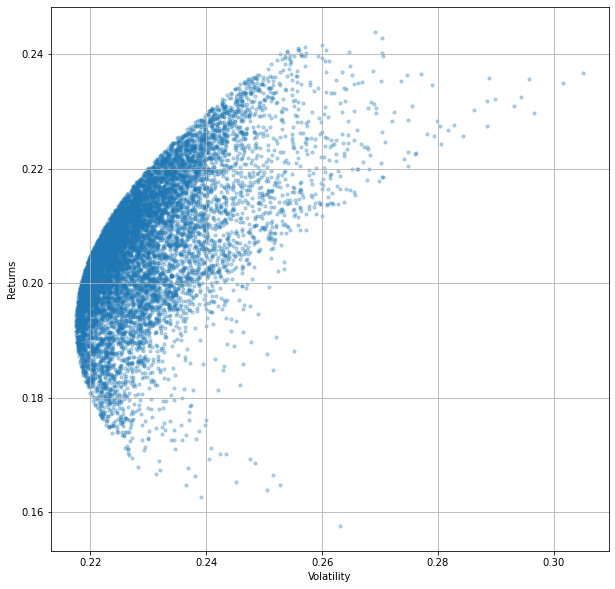

In [1277]:
#Efficient Frontier
Portfolio.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

Minimum volatility portfolio

In [1278]:
min_vol_port = Portfolio.iloc[Portfolio['Volatility'].idxmin()]

In [1279]:
min_vol_port

Returns         0.192634
Volatility      0.217541
SR              0.885508
AAPL weight     0.229536
NKE weight      0.371609
GOOGL weight    0.308500
AMZN weight     0.090356
Name: 6373, dtype: float64

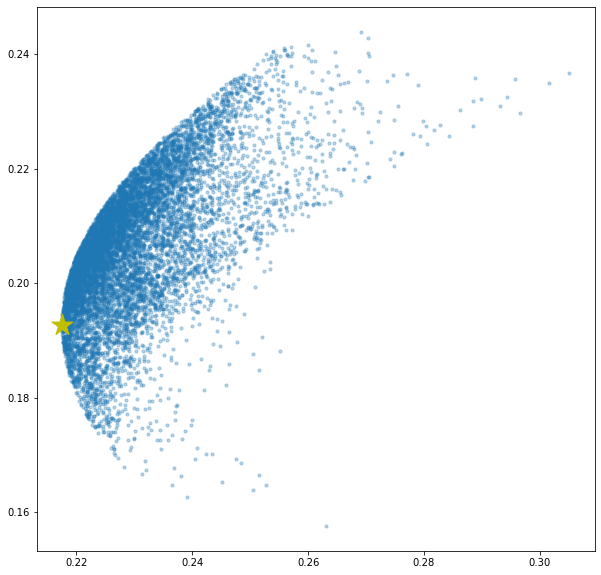

In [1280]:
plt.subplots(figsize=[10,10])
plt.scatter(Portfolio['Volatility'], Portfolio['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='y', marker='*', s=500)

Optimum Portfolio

In [1281]:
optimal_risky_port = Portfolio.iloc[Portfolio['SR'].idxmax()]

In [1282]:
optimal_risky_port

Returns         0.225347
Volatility      0.235011
SR              0.958882
AAPL weight     0.505117
NKE weight      0.137229
GOOGL weight    0.111154
AMZN weight     0.246501
Name: 7933, dtype: float64

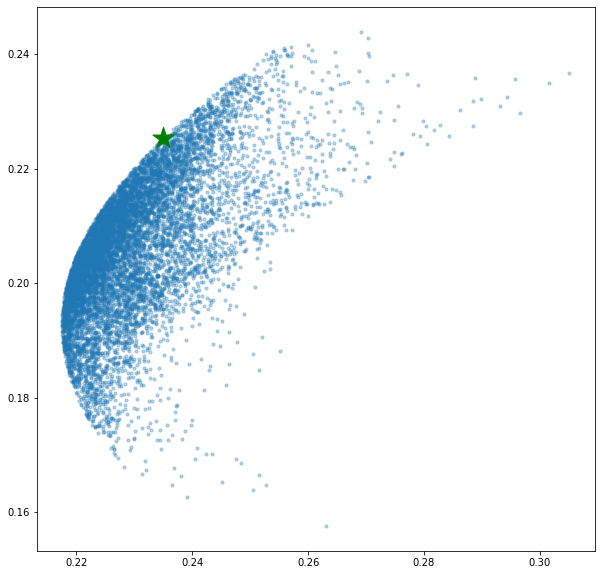

In [1283]:
plt.subplots(figsize=[10,10])
plt.scatter(Portfolio['Volatility'], Portfolio['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

Maximum return portfolio

In [1284]:
max_ret_port = Portfolio.iloc[Portfolio['Returns'].idxmax()]

In [1285]:
max_ret_port

Returns         0.243934
Volatility      0.269165
SR              0.906264
AAPL weight     0.877400
NKE weight      0.001328
GOOGL weight    0.032656
AMZN weight     0.088617
Name: 7570, dtype: float64

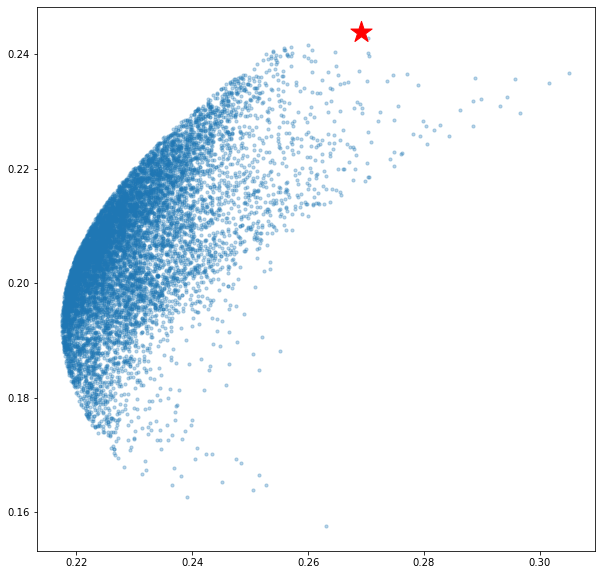

In [1286]:
plt.subplots(figsize=[10,10])
plt.scatter(Portfolio['Volatility'], Portfolio['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(max_ret_port[1], max_ret_port[0], color='r', marker='*', s=500)

Exercise - How to account for situations when there are more than 4 tech stocks, and we want to choose only 1 or 2.

In [1604]:
correlation = Re.corr()

In [1611]:
stocks = []
stocks_2 = []
corr = []
high_correlation = pd.DataFrame([])
for i in correlation.columns:
    for m in correlation[i]:
            if m>0.50 and m<1.1:
                stocks.append(i)
                s = correlation.loc[correlation[i]==m].index.values
                s = "".join(correlation.loc[correlation[i]==m].index.values)
                s = s.replace("'", "")
                #print (s)
                stocks_2.append(s)
                corr.append(m)
                
stocks = pd.DataFrame(stocks)
stocks = stocks.rename(columns={stocks.columns[0]:"Stock Name 1"})    

stocks_2 = pd.DataFrame(stocks_2)
stocks_2 = stocks_2.rename(columns={stocks_2.columns[0]:"Stock Name 2"})   

corr = pd.DataFrame(corr)
corr = corr.rename(columns={corr.columns[0]:"corr"}) 

In [1612]:
high_correlation = pd.concat([stocks,stocks_2,corr],axis=1)

In [1613]:
#high_correlation = high_correlation.drop_duplicates(subset=["corr"])

In [1614]:
#high_correlation.groupby(["Stock Name 1"])

In [1615]:
high_correlation

,Stock Name 1,Stock Name 2,corr
0,AAPL,AAPL,1.000000
1,AAPL,GOOGL,0.557306
2,NKE,NKE,1.000000
3,GOOGL,AAPL,0.557306
4,GOOGL,GOOGL,1.000000
5,GOOGL,AMZN,0.595755
6,AMZN,GOOGL,0.595755
7,AMZN,AMZN,1.000000


In [1616]:
d = {}
for i in range(len(high_correlation["Stock Name 2"])):
    a = high_correlation.loc[high_correlation["Stock Name 1"] == high_correlation.iloc[i,1]]
    print (a)

  Stock Name 1 Stock Name 2      corr
0  AAPL         AAPL         1.000000
1  AAPL         GOOGL        0.557306
  Stock Name 1 Stock Name 2      corr
3  GOOGL        AAPL         0.557306
4  GOOGL        GOOGL        1.000000
5  GOOGL        AMZN         0.595755
  Stock Name 1 Stock Name 2  corr
2  NKE          NKE          1.0 
  Stock Name 1 Stock Name 2      corr
0  AAPL         AAPL         1.000000
1  AAPL         GOOGL        0.557306
  Stock Name 1 Stock Name 2      corr
3  GOOGL        AAPL         0.557306
4  GOOGL        GOOGL        1.000000
5  GOOGL        AMZN         0.595755
  Stock Name 1 Stock Name 2      corr
6  AMZN         GOOGL        0.595755
7  AMZN         AMZN         1.000000
  Stock Name 1 Stock Name 2      corr
3  GOOGL        AAPL         0.557306
4  GOOGL        GOOGL        1.000000
5  GOOGL        AMZN         0.595755
  Stock Name 1 Stock Name 2      corr
6  AMZN         GOOGL        0.595755
7  AMZN         AMZN         1.000000


In [1617]:
high_correlation.loc[high_correlation["Stock Name 1"] == high_correlation.iloc[5,1]]

,Stock Name 1,Stock Name 2,corr
6,AMZN,GOOGL,0.595755
7,AMZN,AMZN,1.000000


Exercise - Change in Portfolio weights only when there is a change of more than 2%

In [1533]:
Weights = []

for date in Re[dt.datetime(2012,1,1):].index:
    if date.day > 1:
        pass
    else:
        ERe=Re[:date- pd.DateOffset(days=1)].mean()
        CovRe=Re[:date- pd.DateOffset(days=1)].cov()
        W = np.linalg.inv(CovRe) @ ERe
        W = np.clip(W,0.001,None)
        W = (W/W.sum())
        #W = np.clip(W,0,0.20)
        W = (W/W.sum())
        Weights.append(W)

data = pd.DataFrame()
#for counter, symbol in enumerate(Re.columns):
    #data[symbol+' weight'] = [w[counter] for w in Weights]

In [1534]:
data = pd.DataFrame()
for counter, symbol in enumerate(Re.columns):
    data[symbol+' weight'] = [w[counter] for w in Weights]

In [1535]:
data_change = data.pct_change()

In [1536]:
data_change = data_change.dropna()

In [1537]:
data_change.head()

,AAPL weight,NKE weight,GOOGL weight,AMZN weight
1,0.046395,-0.228240,-0.225702,-0.225702
2,-0.077425,0.224794,0.170174,450.786195
3,0.056659,-0.066422,0.097419,-0.914586
4,0.116878,-0.999172,0.137860,15.249833
5,0.012348,0.070466,0.070466,-0.221246


In [1553]:
(data_change.loc[(data_change["AAPL weight"] < 0.02) & (data_change["AAPL weight"] > -0.02)])

,AAPL weight,NKE weight,GOOGL weight,AMZN weight
5,0.012348,0.070466,0.070466,-0.221246
6,-0.016217,0.168939,0.168939,0.376079
21,-0.003112,-0.027927,-0.151395,1.693166
22,0.005606,-0.041474,-0.295152,0.911872
36,0.010530,0.075634,-0.075622,-0.022068
39,0.007458,-0.169126,0.213384,0.045846
57,0.009874,-0.047194,2.907914,-0.120986
60,0.006739,-0.210512,-0.997078,0.458102
61,-0.004867,-0.118905,-0.030254,0.070011
69,-0.008015,-0.027886,0.236394,-0.000417


In [1560]:
for i in data_change.columns:
    print (i)

AAPL weight
NKE weight
GOOGL weight
AMZN weight


In [1565]:
for i in data_change.columns:
    df = pd.DataFrame(pd.DataFrame(((data_change.loc[(data_change[i] < 0.02) & (data_change[i] > -0.02)]).head())))

In [1566]:
df

,AAPL weight,NKE weight,GOOGL weight,AMZN weight
24,-0.062305,0.099523,-0.238222,0.011607
34,0.021601,0.037355,-0.074534,-0.007497
37,0.073301,-0.017646,-0.073760,0.004116
41,-0.058778,0.314151,-0.181378,-0.004273
42,0.177482,-0.251584,0.048383,0.005192


In [1567]:
for i in data_change.columns:
    print ((data_change.loc[(data_change[i] < 0.02) & (data_change[i] > -0.02)]).head())

    AAPL weight  NKE weight  GOOGL weight  AMZN weight
5   0.012348     0.070466    0.070466     -0.221246   
6  -0.016217     0.168939    0.168939      0.376079   
21 -0.003112    -0.027927   -0.151395      1.693166   
22  0.005606    -0.041474   -0.295152      0.911872   
36  0.010530     0.075634   -0.075622     -0.022068   
    AAPL weight  NKE weight  GOOGL weight  AMZN weight
18  0.082219    -0.000760   -0.018560     -0.561083   
37  0.073301    -0.017646   -0.073760      0.004116   
49 -0.072888    -0.006134    0.308638     -0.016568   
55  0.029592     0.008672   -0.224732      0.031849   
56  0.062116     0.008543   -0.729177      0.098404   
    AAPL weight  NKE weight  GOOGL weight  AMZN weight
17  0.053612    -0.026193    0.006458     -0.217265   
18  0.082219    -0.000760   -0.018560     -0.561083   
30  0.229759    -0.107457    0.015183      0.041939   
54  0.097893    -0.090187   -0.014493      0.028893   
59  0.117098    -0.101984    0.017192     -0.008335   
    AAPL w